In [1]:
import os 
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import diffxpy.api as de
from helper_de import *
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

In [2]:
import upsetplot

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 35)

In [4]:
adata = sc.read('./../../data/processed/adata_reannotated_final.h5ad')

In [5]:
pickle_dir = './../../results/DE/de_stress_new/pickle/'
base_dir = './../../results/DE/de_stress_new/'
de_results_louvain = []
for subdir, dirs, files in os.walk(pickle_dir):
    for file in files:
        if (
            'pickle' in file
            and 'results' in file
        ):
            with open(subdir + file, 'rb') as f:
                print(subdir + file)
                de_results_louvain.append(pickle.load(f))

./../../results/DE/de_stress_new/pickle/de_results_WT.pickle
./../../results/DE/de_stress_new/pickle/de_results_MR_Dlx.pickle
./../../results/DE/de_stress_new/pickle/de_results_WT_MR.pickle
./../../results/DE/de_stress_new/pickle/de_results_GR_Nex.pickle
./../../results/DE/de_stress_new/pickle/de_results_WT_GR.pickle
./../../results/DE/de_stress_new/pickle/de_results_GR_Dlx.pickle
./../../results/DE/de_stress_new/pickle/de_results_MR_Nex.pickle


# Look at the results

In [6]:
de_results_listofdicts = []
for i, item in enumerate(de_results_louvain):
    de_results_listofdicts.append({
        'louvain_coarse': de_results_louvain[i],
        'test': de_results_louvain[i]['test']
    })

In [7]:
de_genes = de_postprocessing_new(
    de_results_louvain,
    adata,
    clean_sd=True,
    #save = pickle_dir + 'new_genes.pickle'
)

Processing results for test WT
Processing results for test MR_Dlx
Processing results for test WT_MR
Processing results for test GR_Nex
Processing results for test WT_GR
Processing results for test GR_Dlx
Processing results for test MR_Nex


WT_GR
GR_Nex
GR_Dlx


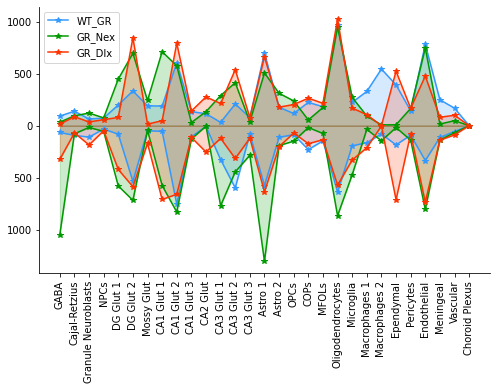

In [47]:
tests = ['WT_GR', 'GR_Nex', 'GR_Dlx']
fig, ax = plt.subplots(
    1,
    1,
    figsize=(7, 6),
    sharey=True
)
colors = ['#3399ff', '#009900', '#ff3300', '#448aa5', '#0088ff']
for i, test in enumerate(tests):
    print(test)
    tmp_df = de_genes_sign_mean[de_genes_sign_mean['test']== test]
    up = tmp_df[tmp_df.log2fc>0].groupby('clust').size()
    down = tmp_df[tmp_df.log2fc<0].groupby('clust').size()
    
    adata_clusts = adata.obs.louvain_coarse.cat.categories
    missing_clusts_up = adata_clusts[~adata_clusts.isin(up.index)]
    missing_clusts_down = adata_clusts[~adata_clusts.isin(down.index)]
    
    for miss_clust in missing_clusts_up:
        up.loc[miss_clust] = 0
    for miss_clust in missing_clusts_down:
        down.loc[miss_clust] = 0
    up = up.loc[adata_clusts]
    down = down.loc[adata_clusts]
    
    ax.plot(up.index, up.values, color=colors[i], marker='*', label=tests[i])
    ax.fill_between(
        np.arange(len(up)), 
        0, 
        up.values.astype(int), 
        color=colors[i], 
        alpha=0.2
    )
    
    ax.plot(down.index, -down.values, color=colors[i], marker='*')
    ax.fill_between(
        np.arange(len(down)), 
        0, 
        -down.values.astype(int), 
        color=colors[i], 
        alpha=0.2
    )


ax.set_yticklabels([str(int(abs(x))) for x in ax.get_yticks()])
ax.set_xticks(np.arange(len(up.index)))
ax.set_xticklabels(up.index, rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend()
sns.despine()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

WT_MR
MR_Nex
MR_Dlx


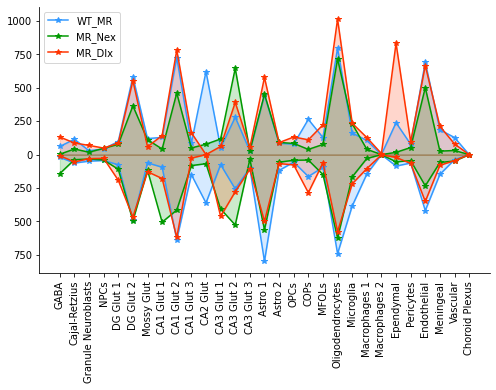

In [49]:
tests = ['WT_MR', 'MR_Nex', 'MR_Dlx']
fig, ax = plt.subplots(
    1,
    1,
    figsize=(7, 6),
    sharey=True
)
colors = ['#3399ff', '#009900', '#ff3300', '#448aa5', '#0088ff']
for i, test in enumerate(tests):
    print(test)
    tmp_df = de_genes_sign_mean[de_genes_sign_mean['test']== test]
    up = tmp_df[tmp_df.log2fc>0].groupby('clust').size()
    down = tmp_df[tmp_df.log2fc<0].groupby('clust').size()
    
    adata_clusts = adata.obs.louvain_coarse.cat.categories
    missing_clusts_up = adata_clusts[~adata_clusts.isin(up.index)]
    missing_clusts_down = adata_clusts[~adata_clusts.isin(down.index)]
    
    for miss_clust in missing_clusts_up:
        up.loc[miss_clust] = 0
    for miss_clust in missing_clusts_down:
        down.loc[miss_clust] = 0
    up = up.loc[adata_clusts]
    down = down.loc[adata_clusts]
    
    ax.plot(up.index, up.values, color=colors[i], marker='*', label=tests[i])
    ax.fill_between(
        np.arange(len(up)), 
        0, 
        up.values.astype(int), 
        color=colors[i], 
        alpha=0.2
    )
    
    ax.plot(down.index, -down.values, color=colors[i], marker='*')
    ax.fill_between(
        np.arange(len(down)), 
        0, 
        -down.values.astype(int), 
        color=colors[i], 
        alpha=0.2
    )


ax.set_yticklabels([str(int(abs(x))) for x in ax.get_yticks()])
ax.set_xticks(np.arange(len(up.index)))
ax.set_xticklabels(up.index, rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend()
sns.despine()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

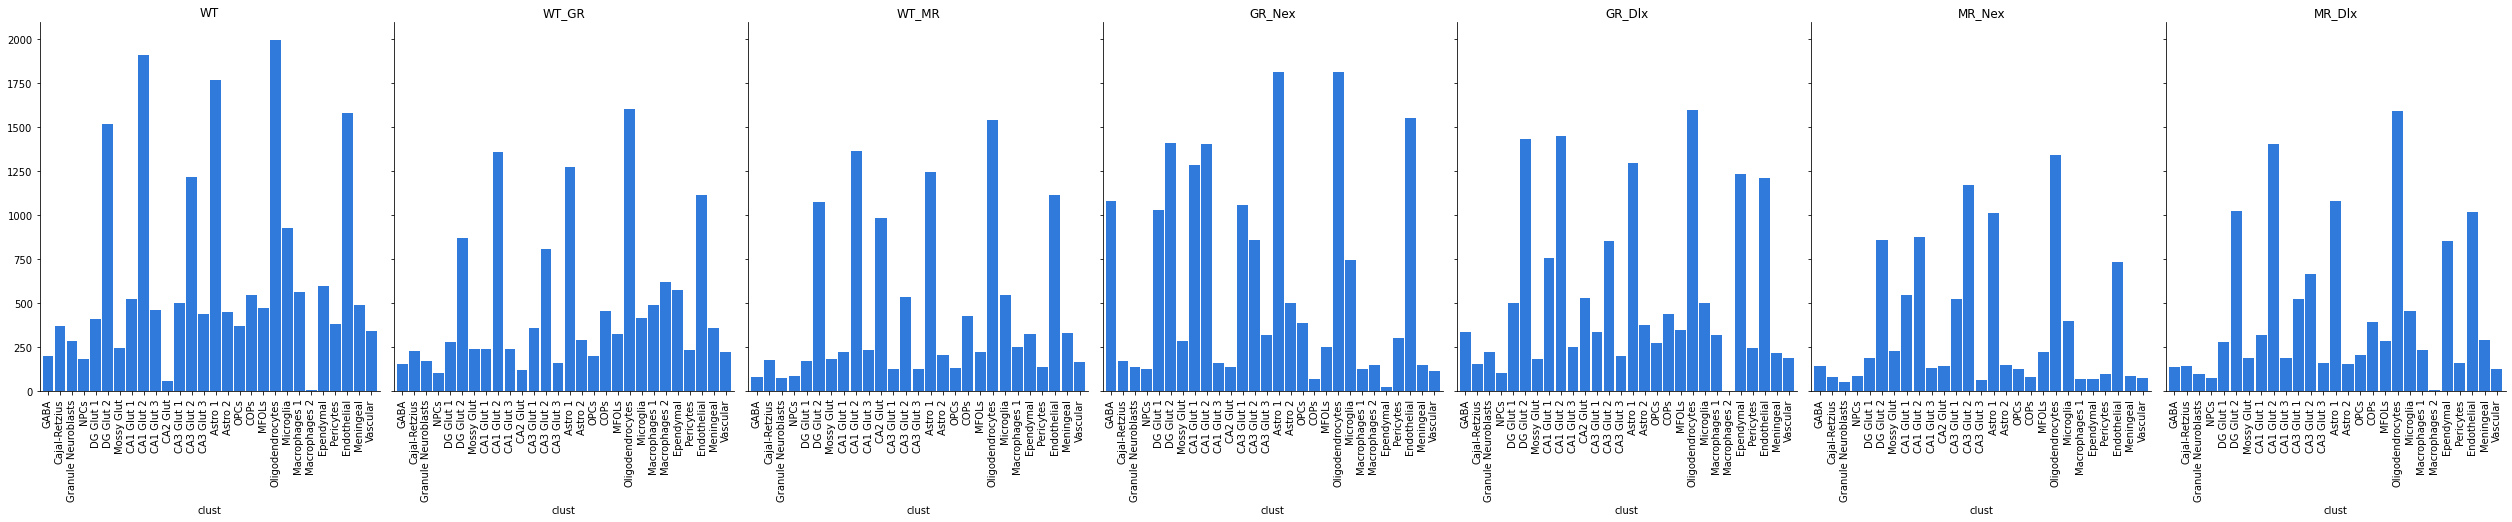

In [41]:
tests = ['WT', 'WT_GR', 'WT_MR', 'GR_Nex', 'GR_Dlx', 'MR_Nex', 'MR_Dlx']
fig, ax = plt.subplots(
    1,
    len(tests),
    figsize=(5*len(tests), 8),
    sharey=True
)

for i, test in enumerate(tests):
    tmp_df = de_genes_sign_mean[de_genes_sign_mean['test']==test]
    tmp_df = tmp_df.assign(up_down='up')
    tmp_df['clust'] = tmp_df.clust.astype('category')
    tmp_df['clust'] = tmp_df.clust.cat.reorder_categories(
        adata.obs.louvain_coarse.cat.categories[adata.obs.louvain_coarse.cat.categories.isin(tmp_df.clust.unique())]
    )
    (
        tmp_df
        .groupby('clust')
        .size()
        .plot(
            kind='bar', 
            color=['#307adb'], 
            width=0.9,
            ax=ax[i]
        )
    )
    ax[i].set_yticklabels([str(int(abs(x))) for x in ax[i].get_yticks()])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_title(test)

sns.despine()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [16]:
t = t[np.abs(t['log2fc'])>5]
t['coef_sd']

259493    2.222759e-162
259494    2.222759e-162
259495    2.222759e-162
259496    2.222759e-162
259497    2.222759e-162
              ...      
269769    2.222759e-162
273403     1.947703e+63
274675     1.947703e+63
275559     1.157846e+08
276498     1.125587e+08
Name: coef_sd, Length: 8181, dtype: float64

GABA
Cajal-Retzius
Granule Neuroblasts
NPCs
DG Glut 1
DG Glut 2
Mossy Glut
CA1 Glut 1
CA1 Glut 2
CA1 Glut 3
CA2 Glut
CA3 Glut 1
CA3 Glut 2
CA3 Glut 3
Astro 1
Astro 2
OPCs
COPs
MFOLs
Oligodendrocytes
Microglia
Macrophages 1
Macrophages 2
Ependymal
Pericytes
Endothelial
Meningeal
Vascular


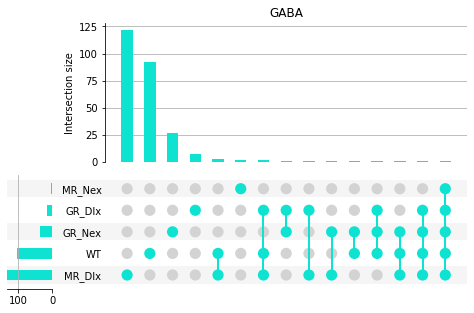

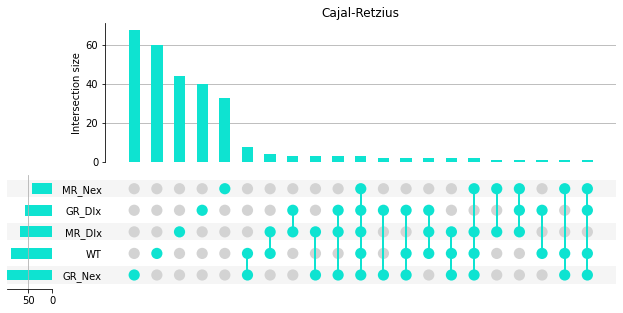

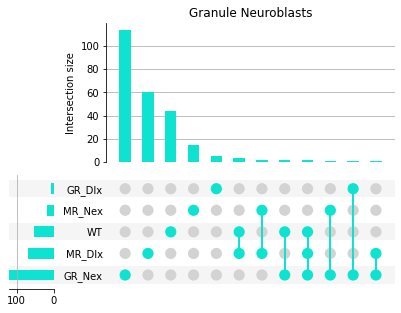

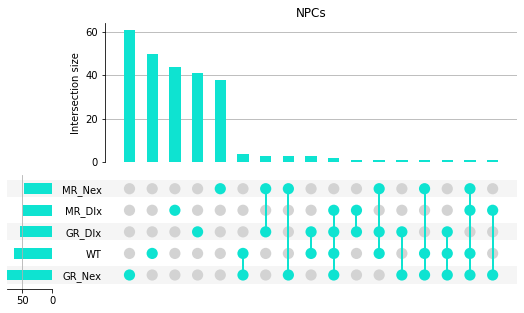

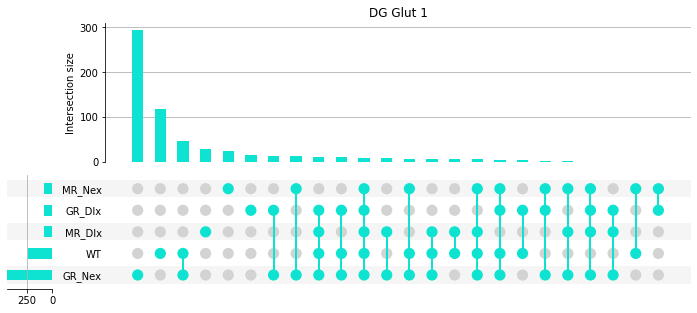

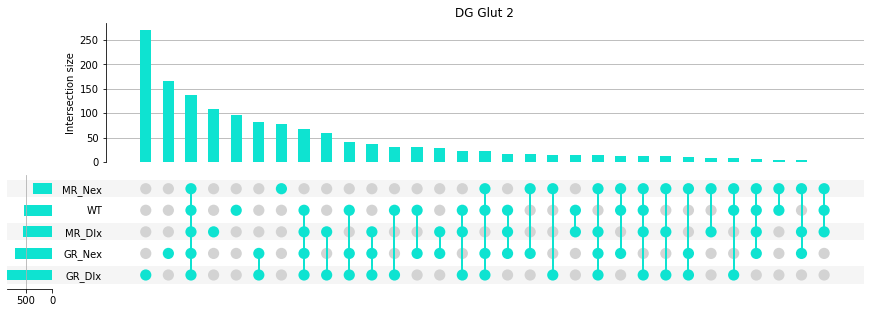

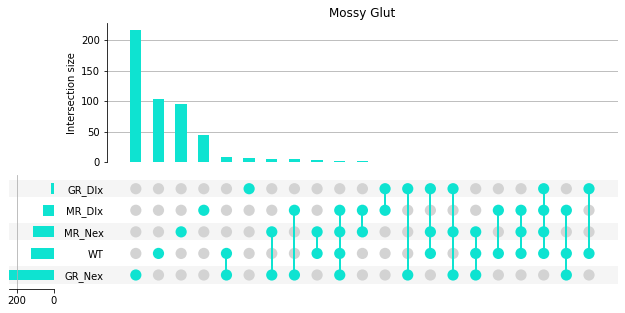

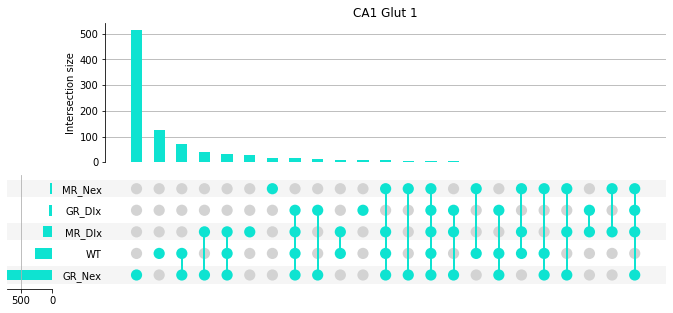

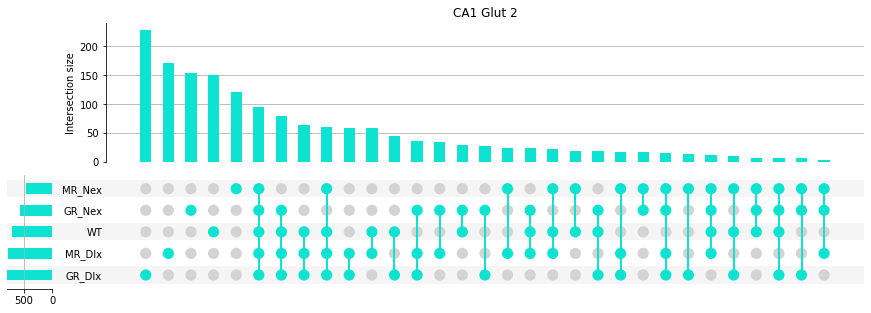

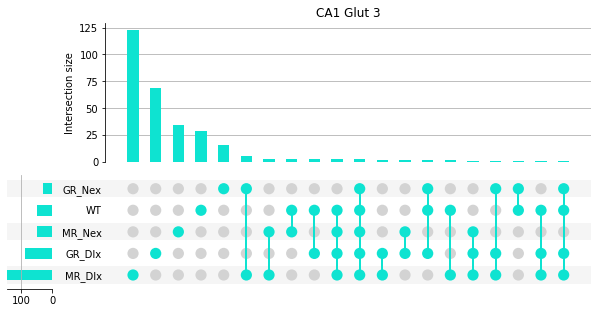

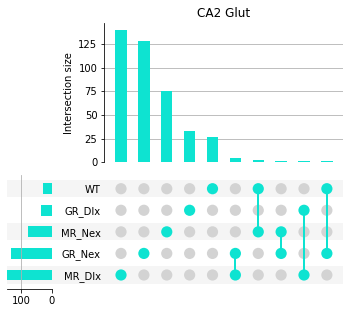

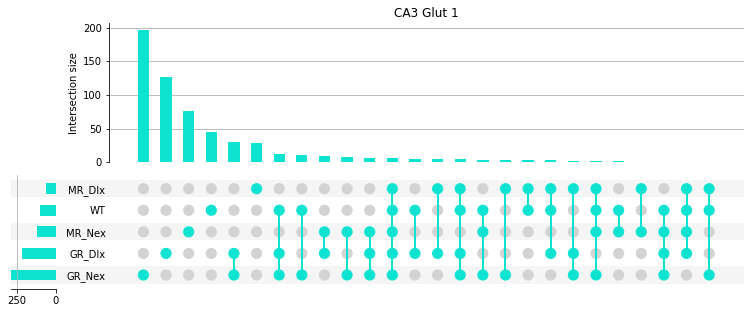

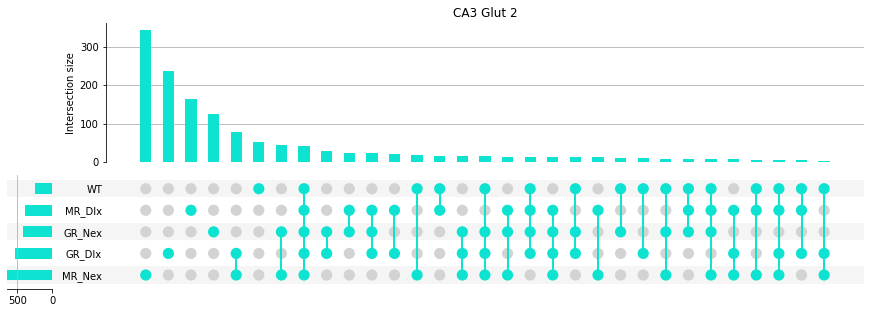

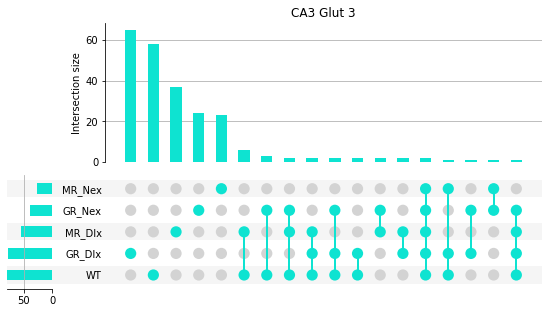

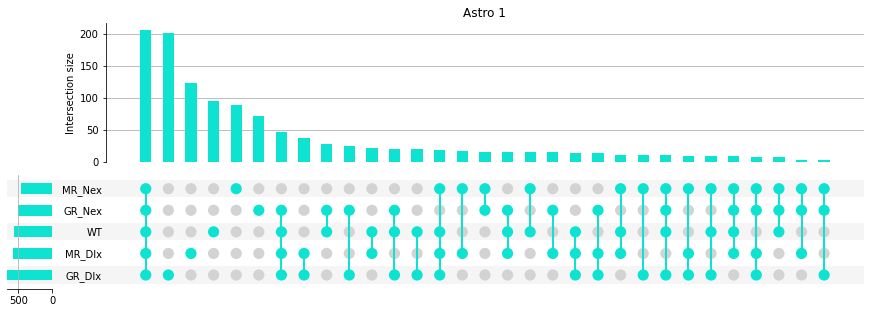

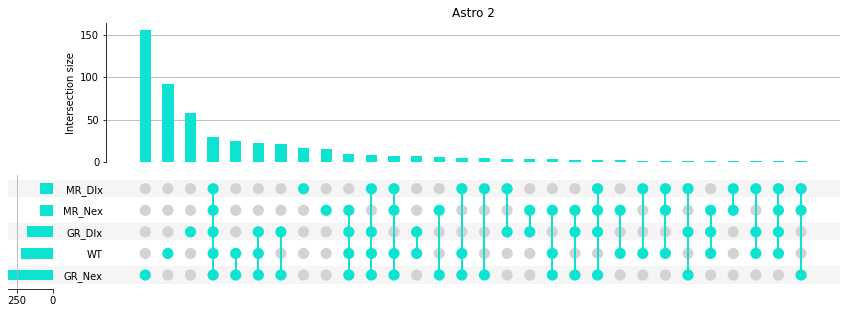

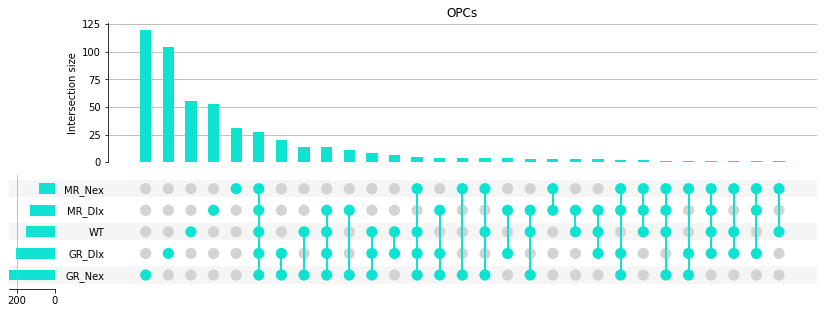

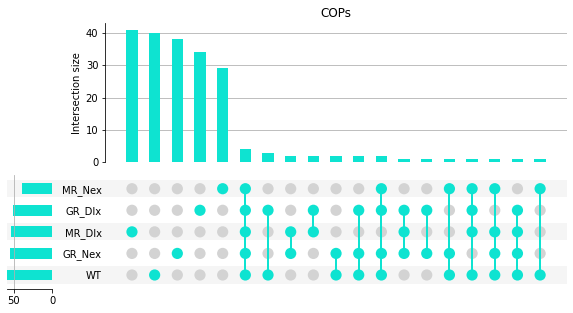

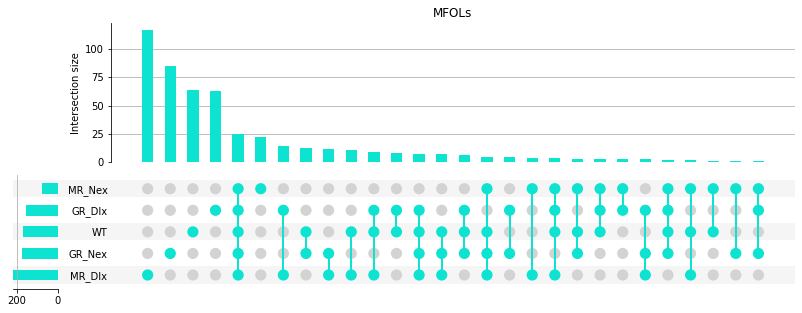

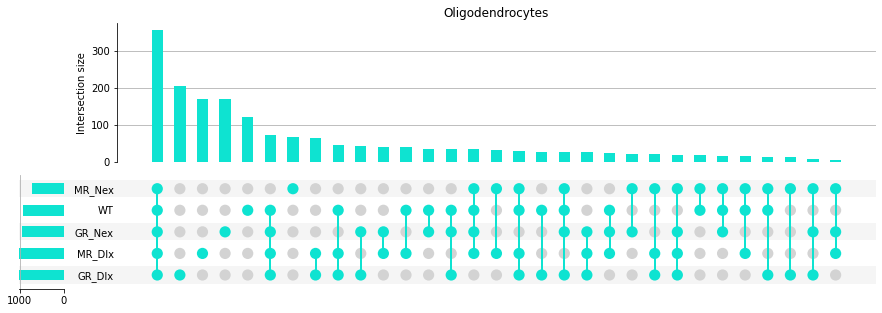

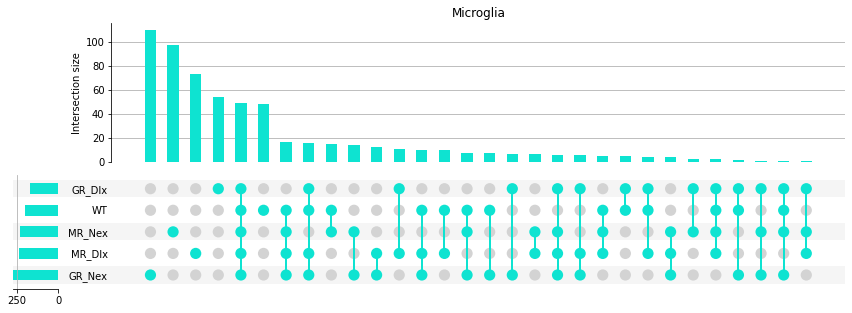

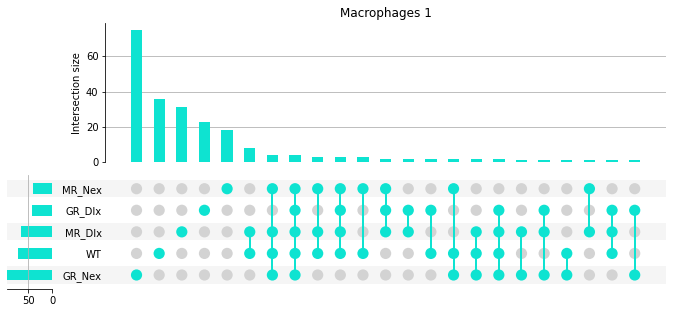

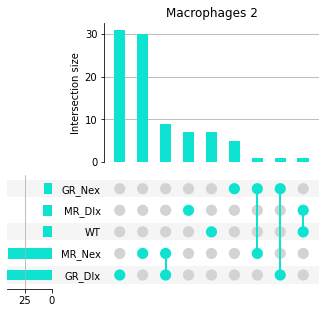

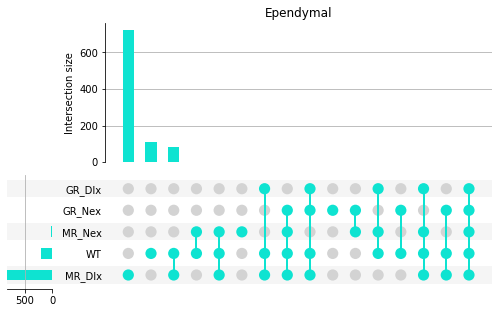

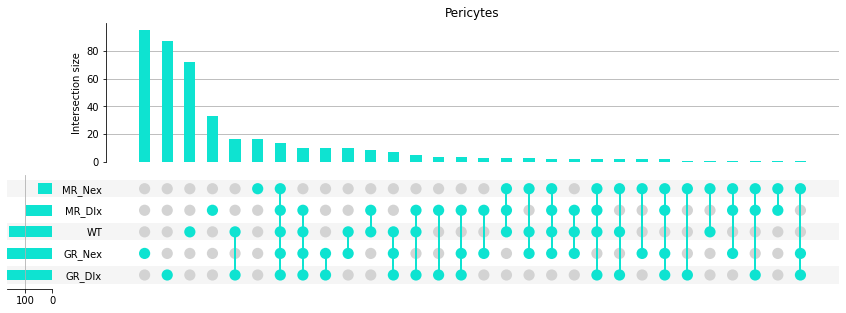

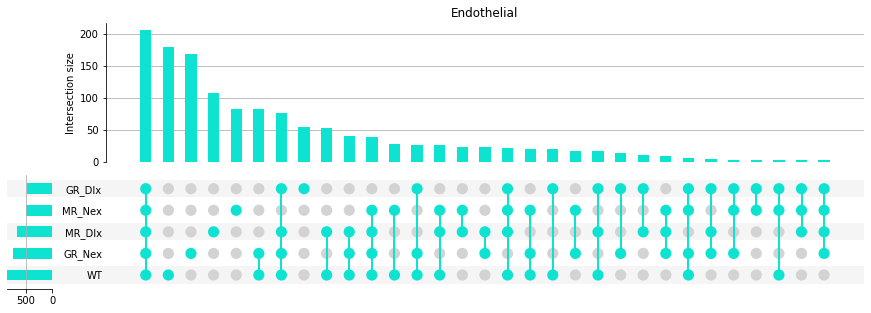

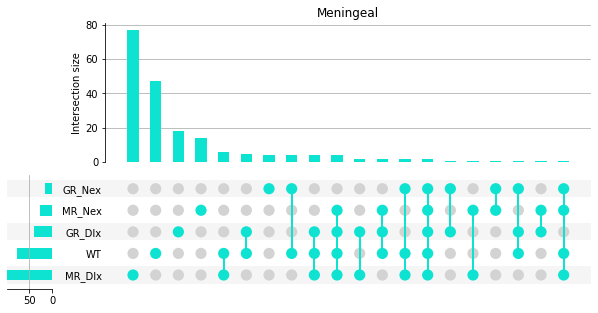

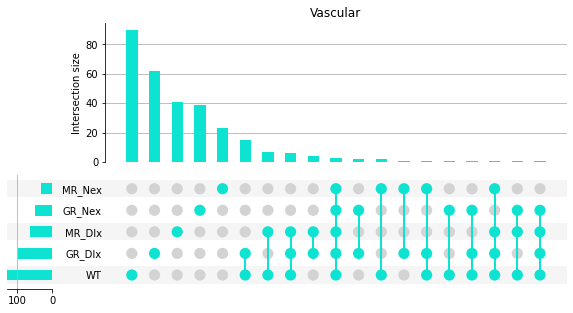

In [30]:
gene_sets = {}
df_final_sign = de_genes[de_genes['qval']< 0.05]
tmp_df = df_final_sign[~df_final_sign['test'].isin(['WT_MR', 'WT_GR'])]

for clust in tmp_df.clust.unique():
    print(clust)
    loop_df = tmp_df[tmp_df['clust']==clust]
    loop_df = loop_df[(loop_df['mean_ctrl']>0.1) | (loop_df['mean_pert']>0.1)]
    loop_df = loop_df[loop_df['log2fc']>0.1]
    for test in loop_df.test.unique():
        gene_sets[test] = set(loop_df[loop_df.test==test].gene.tolist())
    upset_data_sub = upsetplot.from_contents(gene_sets)
    axs = upsetplot.plot(upset_data_sub, sort_by='cardinality', facecolor='#0ee3d1')
    axs['intersections'].set_title(clust)
    plt.savefig(base_dir + 'figures/upset_' + clust + '_up.png', dpi=600)

GABA
Cajal-Retzius
Granule Neuroblasts
NPCs
DG Glut 1
DG Glut 2
Mossy Glut
CA1 Glut 1
CA1 Glut 2
CA1 Glut 3
CA2 Glut
CA3 Glut 1
CA3 Glut 2
CA3 Glut 3
Astro 1
Astro 2
OPCs
COPs
MFOLs
Oligodendrocytes
Microglia


/app/python3/lib/python3.8/site-packages/upsetplot/plotting.py:594: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=self._default_figsize)


Macrophages 1
Macrophages 2
Ependymal
Pericytes
Endothelial
Meningeal
Vascular


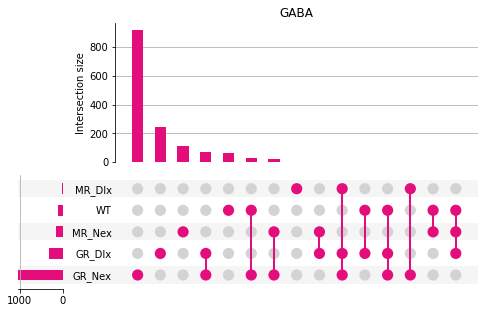

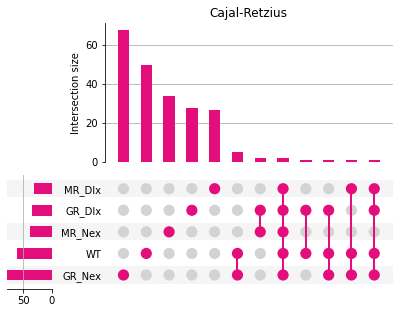

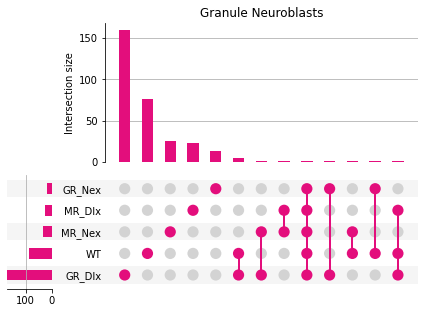

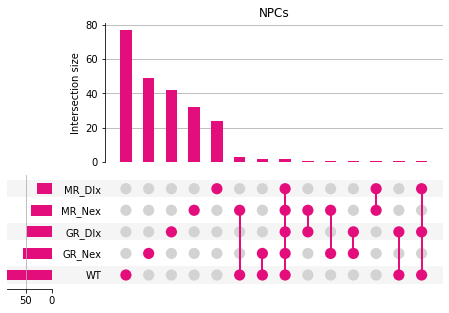

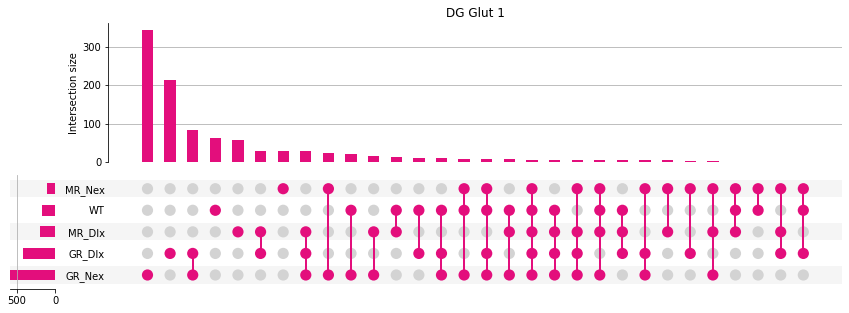

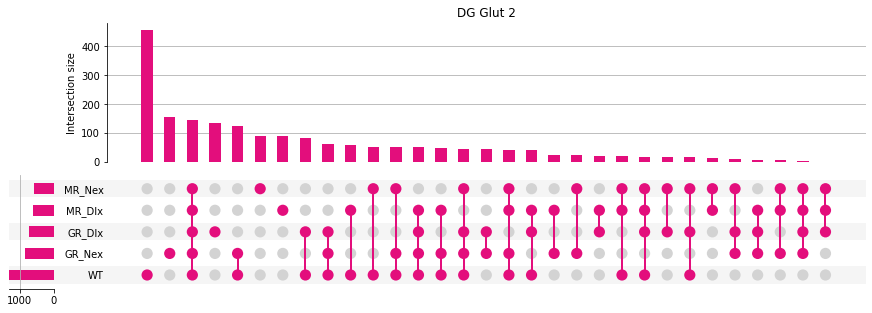

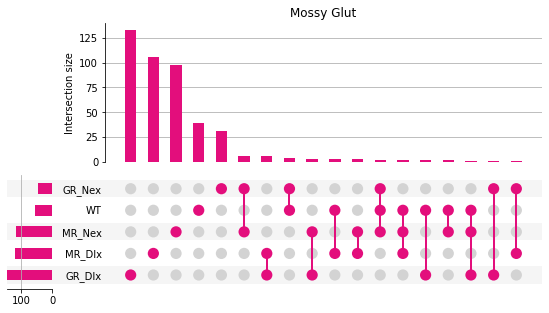

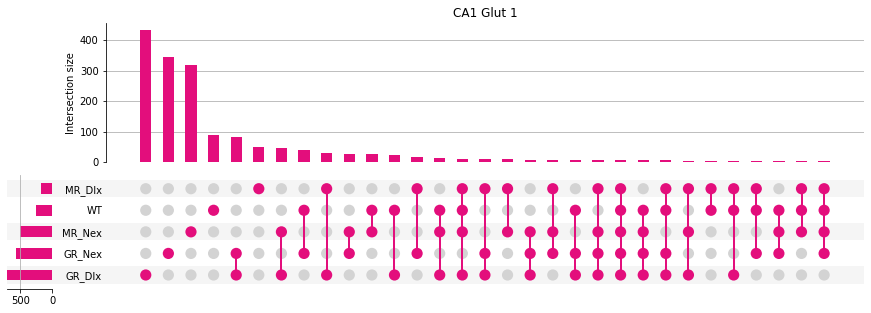

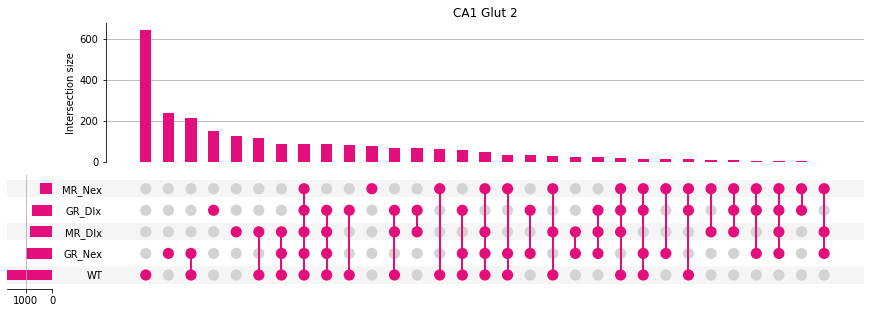

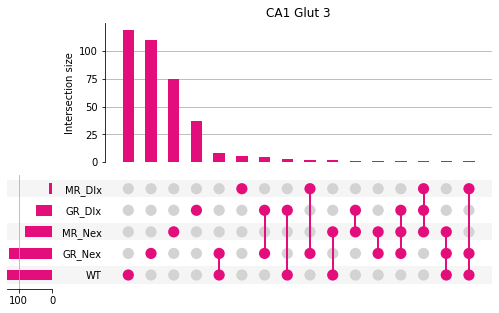

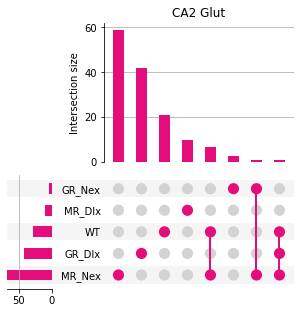

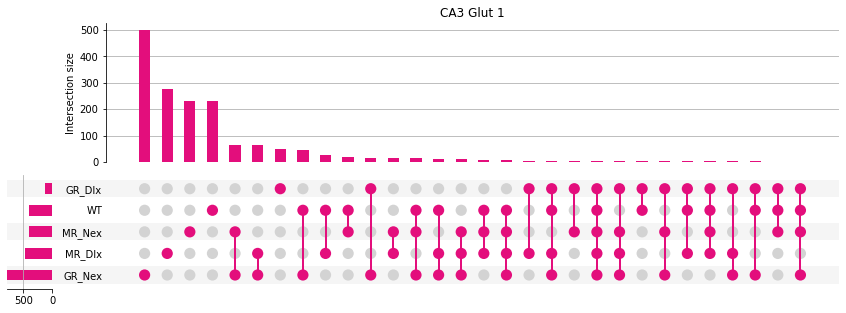

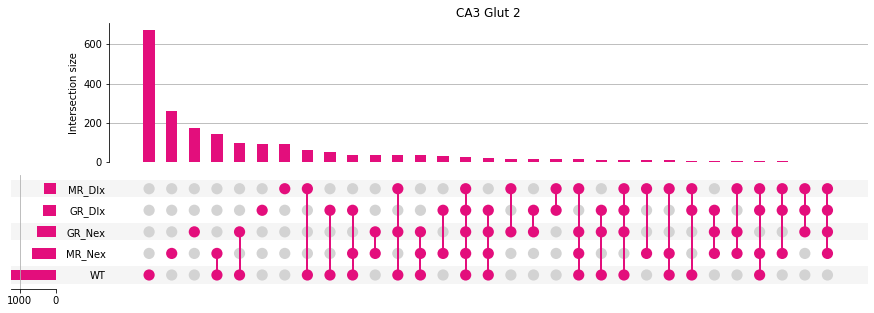

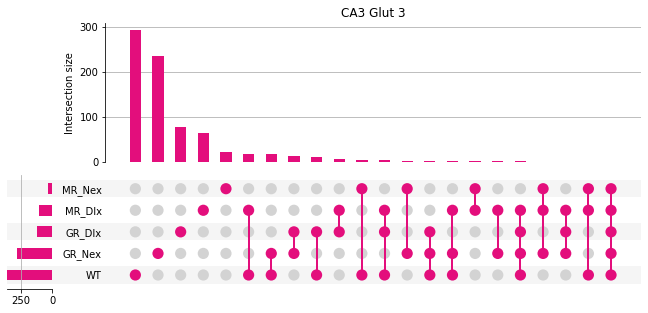

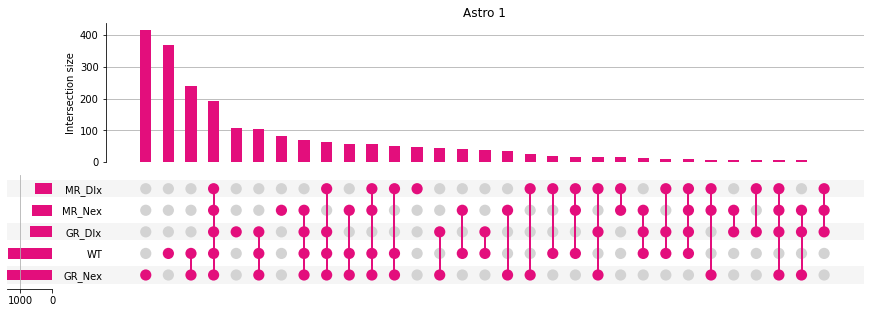

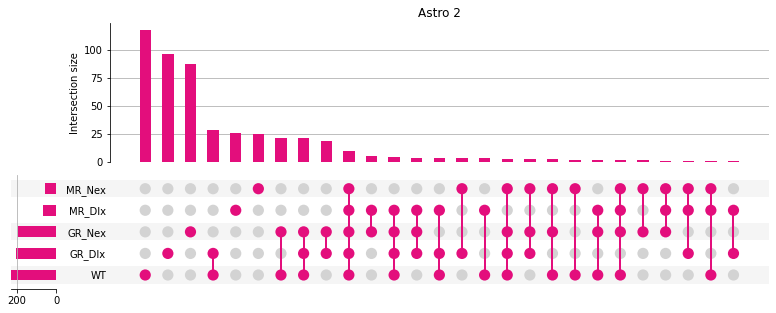

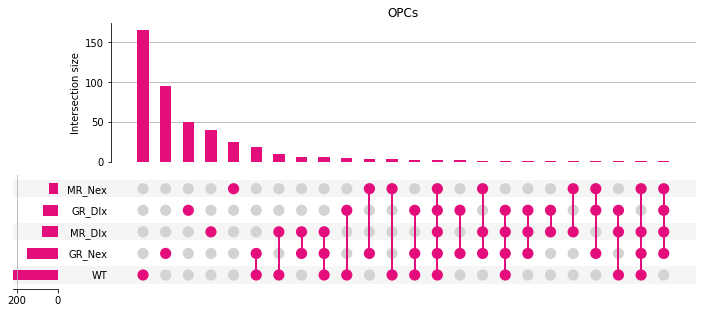

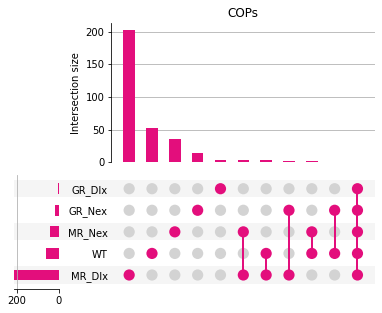

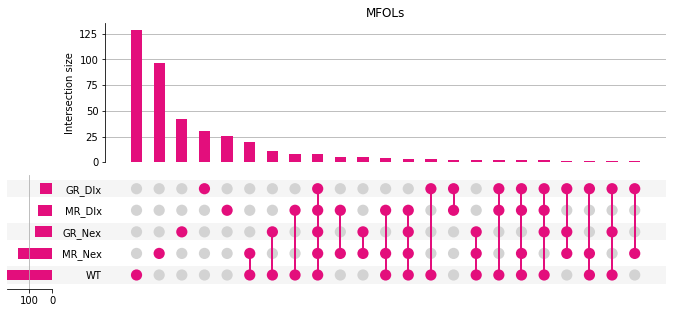

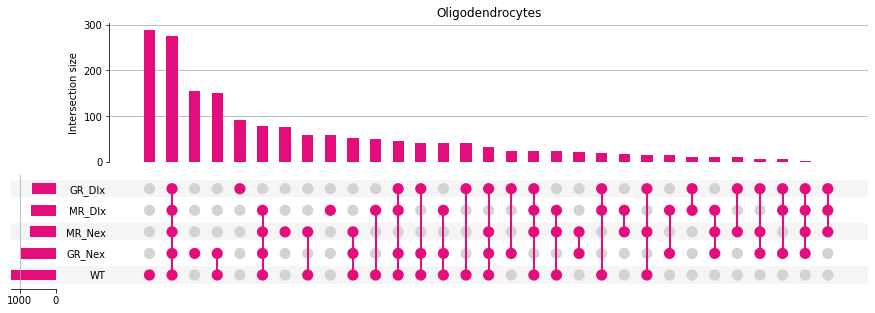

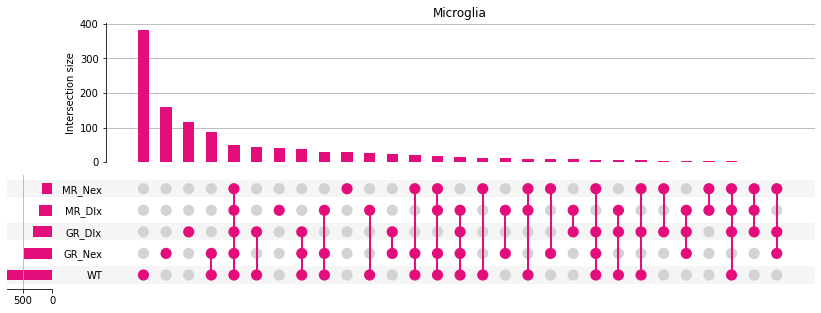

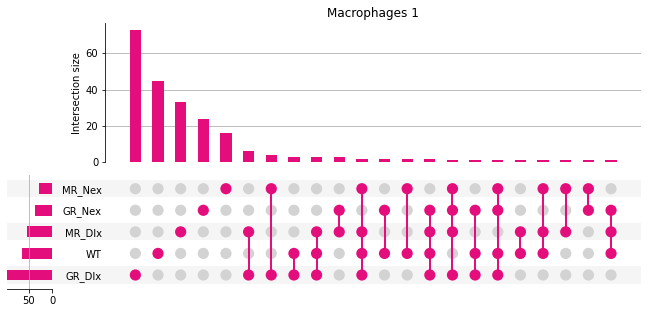

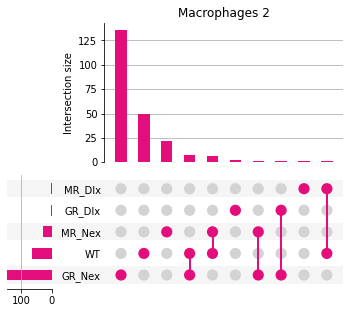

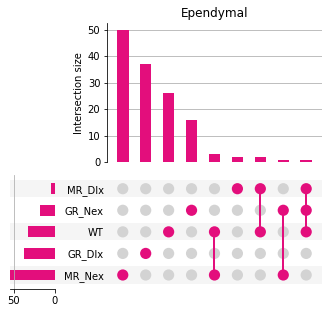

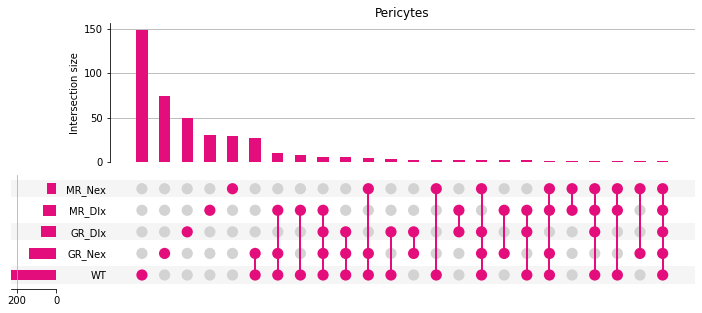

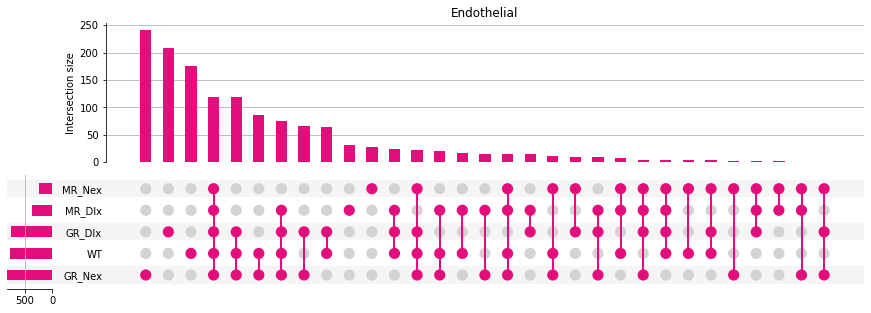

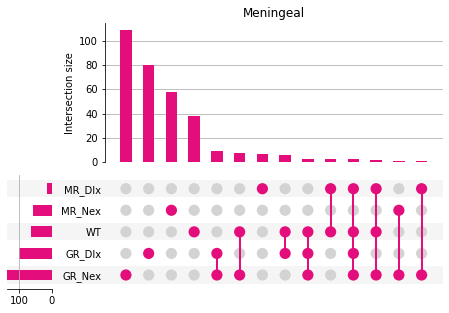

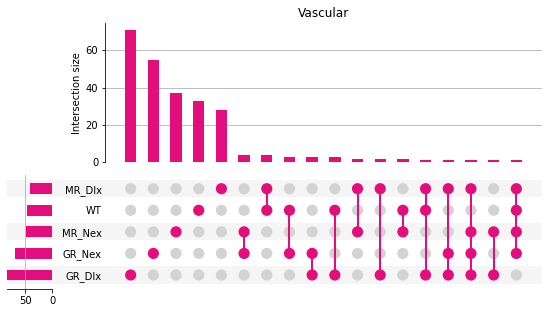

In [12]:
gene_sets = {}
tmp_df = df_final_sign[~df_final_sign['test'].isin(['WT_MR', 'WT_GR'])]

for clust in tmp_df.clust.unique():
    print(clust)
    loop_df = tmp_df[tmp_df['clust']==clust]
    loop_df = loop_df[(loop_df['mean_ctrl']>0.1) | (loop_df['mean_pert']>0.1)]
    loop_df = loop_df[loop_df['log2fc']<0.1]
    for test in loop_df.test.unique():
        gene_sets[test] = set(loop_df[loop_df.test==test].gene.tolist())
    upset_data_sub = upsetplot.from_contents(gene_sets)
    axs = upsetplot.plot(upset_data_sub, sort_by='cardinality', facecolor='#e30e7c')
    axs['intersections'].set_title(clust)
    plt.savefig(base_dir + 'figures/upset_' + clust + '_down.png', dpi=600)

In [18]:
df_final_sign['clust_type'] = 'Non Neurons'
df_final_sign['clust_type'][df_final_sign['clust'].str.contains('Glut|GABA|Neuro|NPCs')] = 'Neurons'

<ipython-input-18-5ab6b5a3a85d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_sign['clust_type'] = 'Non Neurons'
<ipython-input-18-5ab6b5a3a85d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_sign['clust_type'][df_final_sign['clust'].str.contains('Glut|GABA|Neuro|NPCs')] = 'Neurons'
/app/python3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

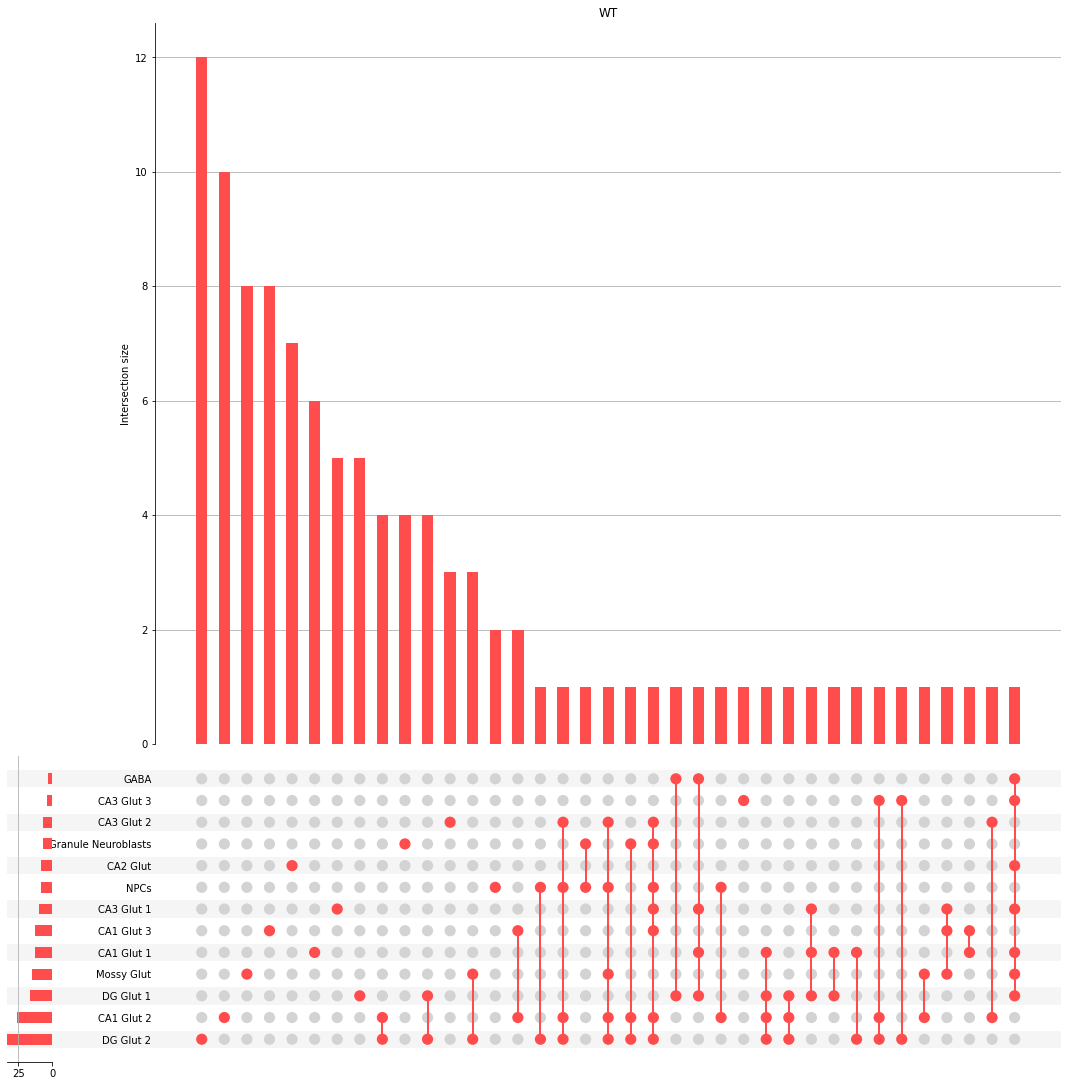

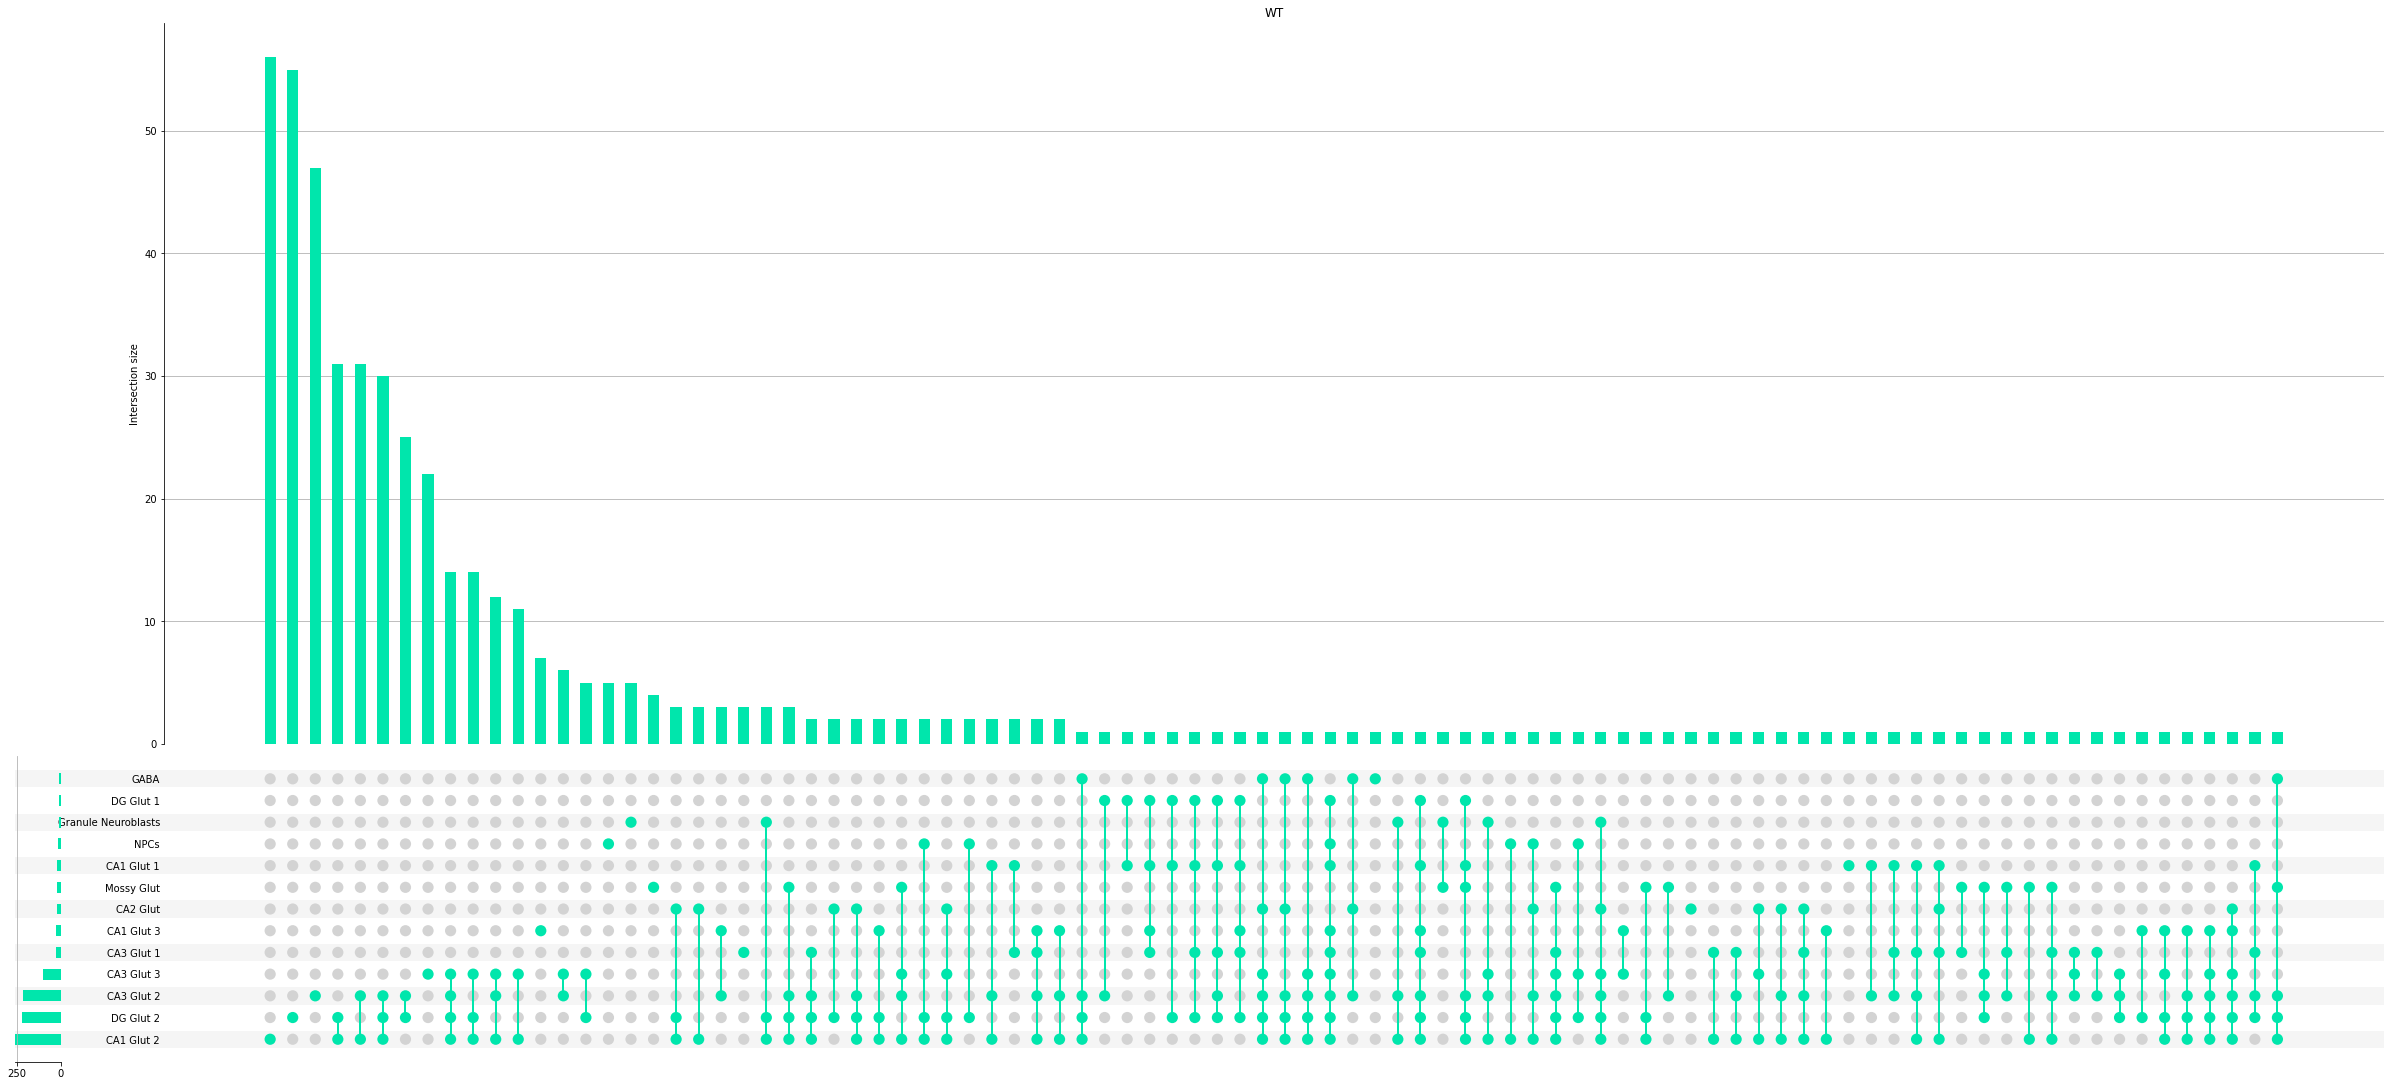

In [21]:
gene_sets = {}
tmp_df = df_final_sign[df_final_sign['test'].isin(['WT'])]
tmp_df = df_final_sign[df_final_sign['clust_type']=="Neurons"]
for test in ['WT']:
    loop_df = tmp_df[tmp_df['test']==test]
    loop_df = loop_df[(loop_df['mean_ctrl']>1) | (loop_df['mean_pert']>1)]
    loop_df = loop_df[loop_df['log2fc']>0.1]
    for clust in loop_df.clust.unique():
        gene_sets[clust] = set(loop_df[loop_df.clust==clust].gene.tolist())
    upset_data_sub = upsetplot.from_contents(gene_sets)
    axs = upsetplot.plot(
        upset_data_sub, 
        sort_by='cardinality', 
        facecolor='#ff4d4d',
        intersection_plot_elements=30
    )
    axs['intersections'].set_title(test)
    plt.savefig(base_dir + 'figures/upset_' + test + '.png', dpi=200)
    
tmp_df = df_final_sign[df_final_sign['test'].isin(['WT'])]
tmp_df = df_final_sign[df_final_sign['clust_type']=="Neurons"]
for test in ['WT']:
    loop_df = tmp_df[tmp_df['test']==test]
    loop_df = loop_df[(loop_df['mean_ctrl']>1) | (loop_df['mean_pert']>1)]
    loop_df = loop_df[loop_df['log2fc']<0.1]
    for clust in loop_df.clust.unique():
        gene_sets[clust] = set(loop_df[loop_df.clust==clust].gene.tolist())
    upset_data_sub = upsetplot.from_contents(gene_sets)
    axs = upsetplot.plot(
        upset_data_sub, 
        sort_by='cardinality', 
        facecolor='#00e6ac',
        intersection_plot_elements=30
    )
    axs['intersections'].set_title(test)
    plt.savefig(base_dir + 'figures/upset_' + test + '.png', dpi=200)

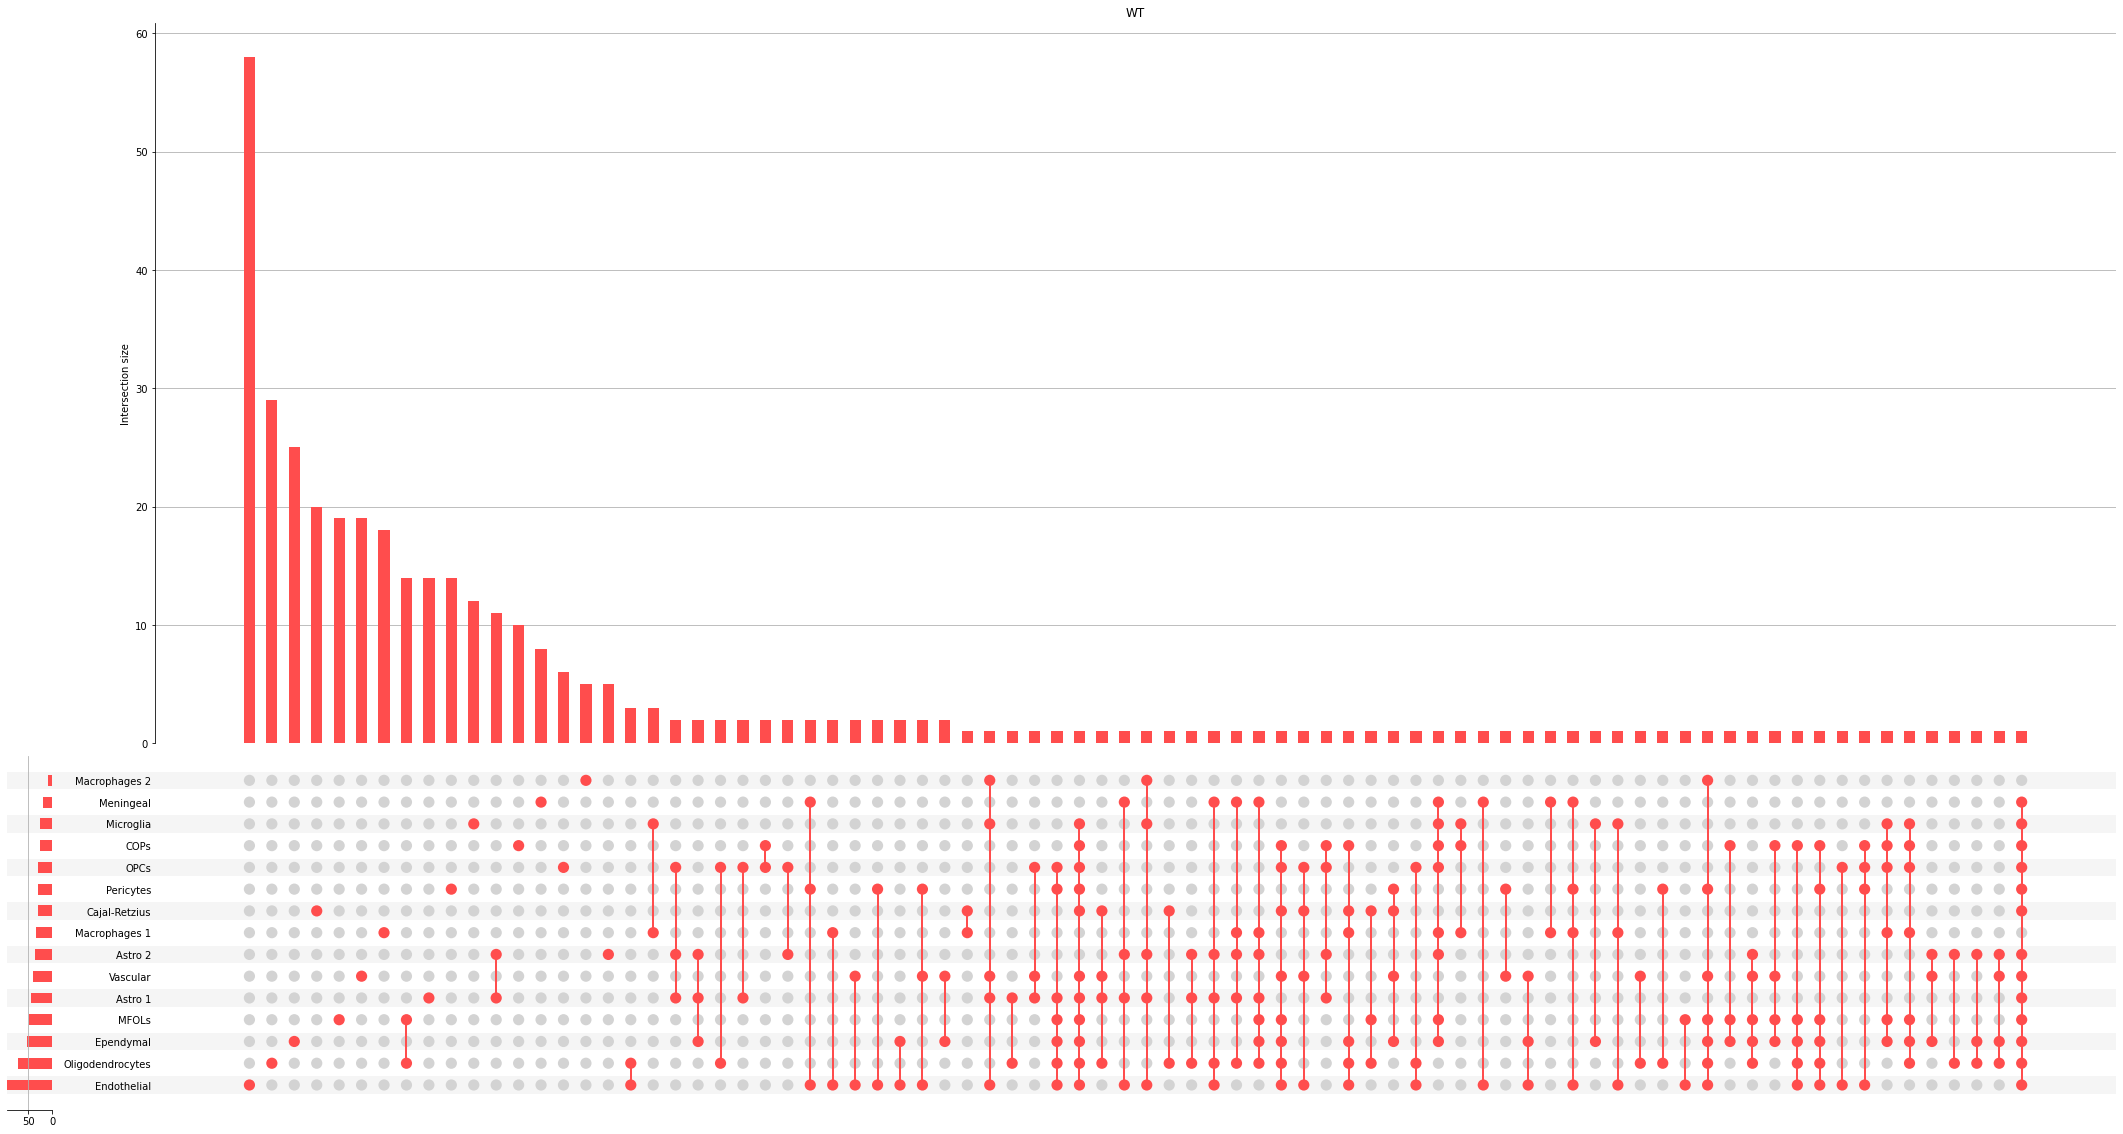

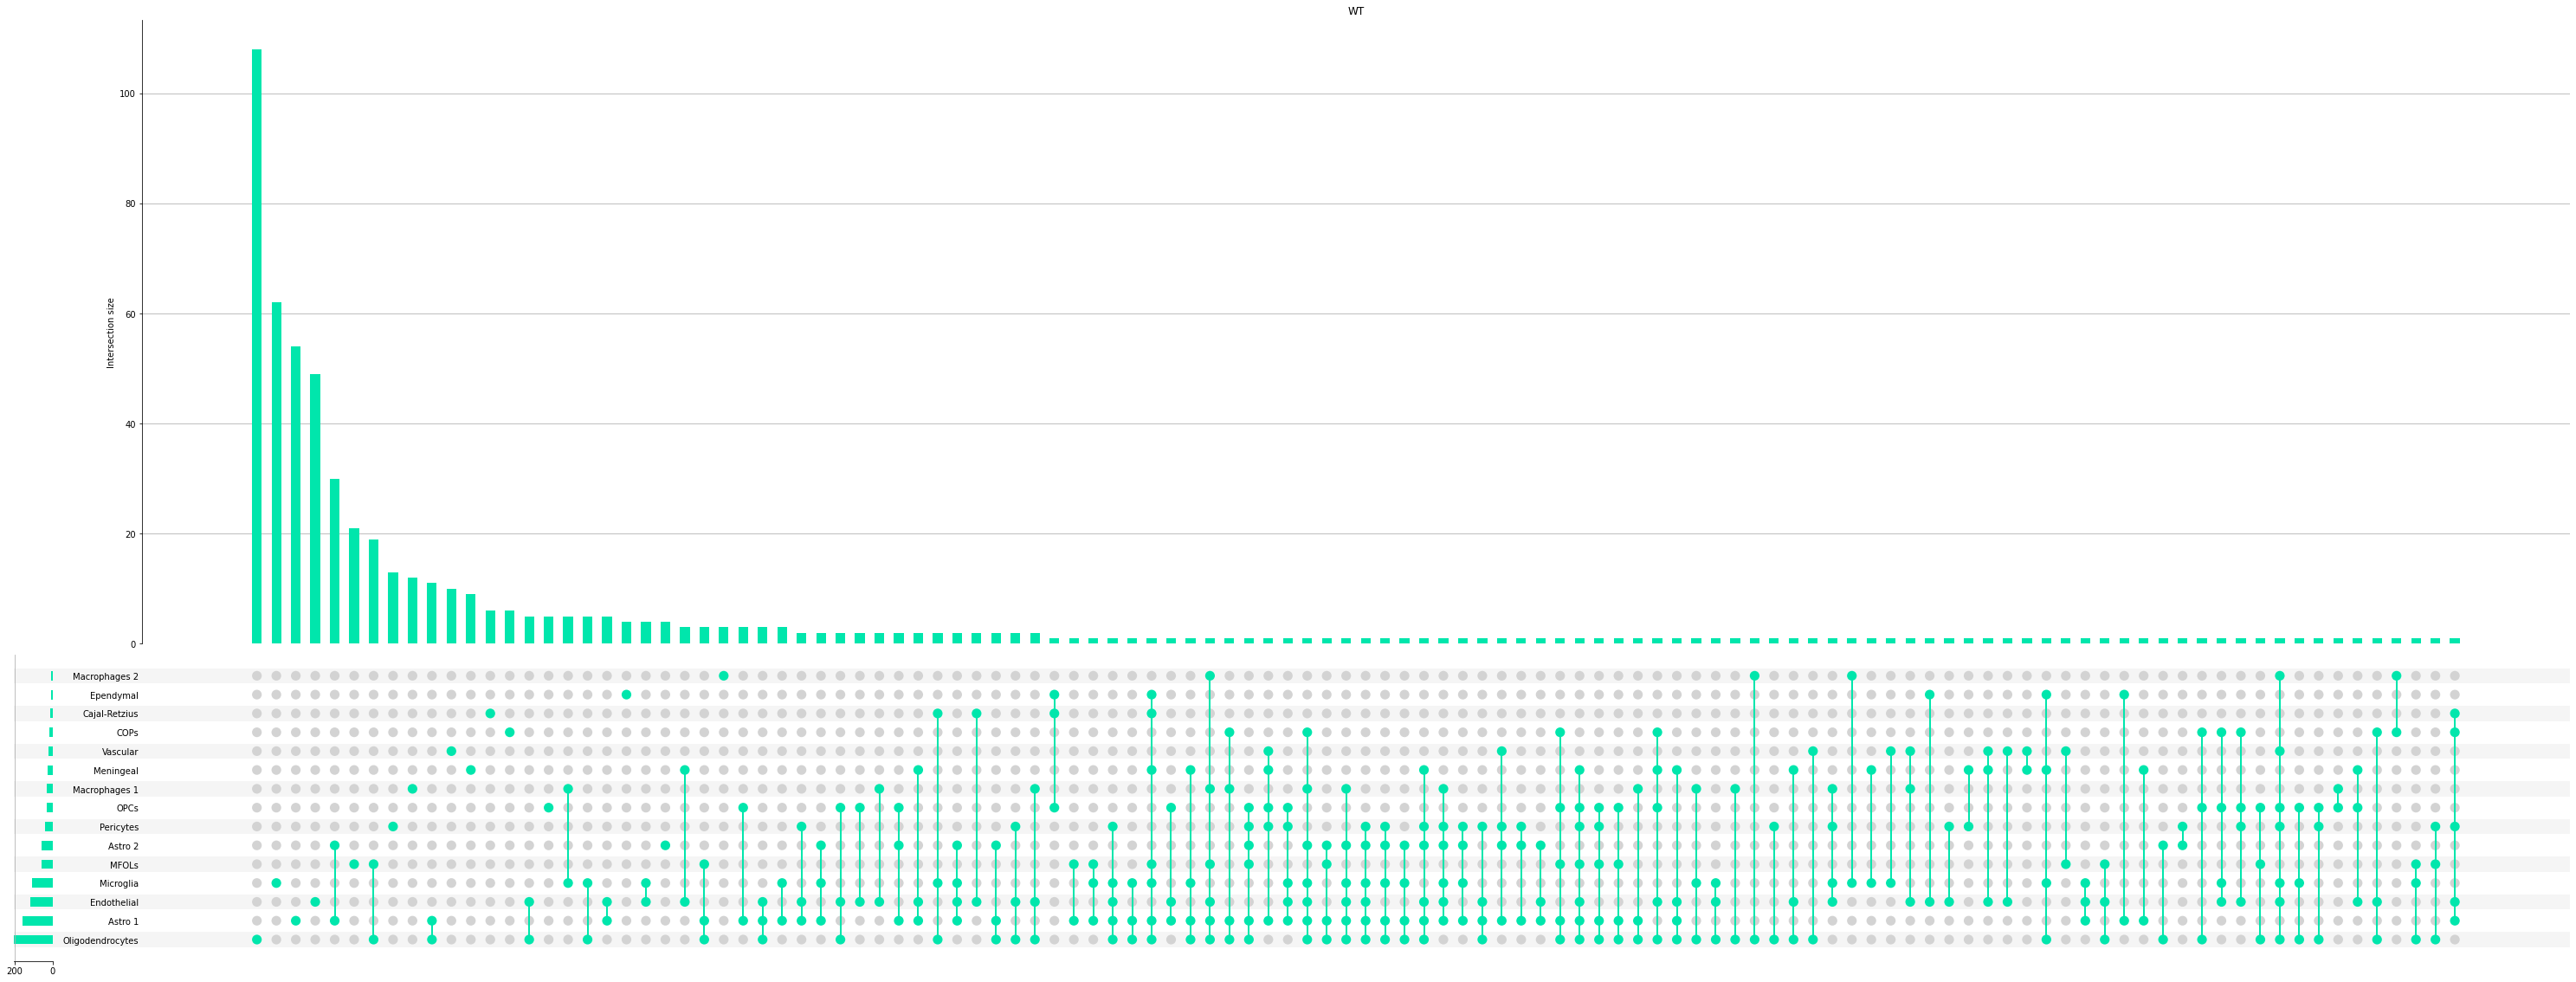

In [23]:
gene_sets = {}
tmp_df = df_final_sign[df_final_sign['test'].isin(['WT'])]
tmp_df = df_final_sign[df_final_sign['clust_type']=="Non Neurons"]
for test in ['WT']:
    loop_df = tmp_df[tmp_df['test']==test]
    loop_df = loop_df[(loop_df['mean_ctrl']>1) | (loop_df['mean_pert']>1)]
    loop_df = loop_df[loop_df['log2fc']>0.1]
    for clust in loop_df.clust.unique():
        gene_sets[clust] = set(loop_df[loop_df.clust==clust].gene.tolist())
    upset_data_sub = upsetplot.from_contents(gene_sets)
    axs = upsetplot.plot(
        upset_data_sub, 
        sort_by='cardinality', 
        facecolor='#ff4d4d',
        intersection_plot_elements=30
    )
    axs['intersections'].set_title(test)
    plt.savefig(base_dir + 'figures/upset_' + test + '.png', dpi=200)
    
tmp_df = df_final_sign[df_final_sign['test'].isin(['WT'])]
tmp_df = df_final_sign[df_final_sign['clust_type']=="Non Neurons"]
for test in ['WT']:
    loop_df = tmp_df[tmp_df['test']==test]
    loop_df = loop_df[(loop_df['mean_ctrl']>1) | (loop_df['mean_pert']>1)]
    loop_df = loop_df[loop_df['log2fc']<0.1]
    for clust in loop_df.clust.unique():
        gene_sets[clust] = set(loop_df[loop_df.clust==clust].gene.tolist())
    upset_data_sub = upsetplot.from_contents(gene_sets)
    axs = upsetplot.plot(
        upset_data_sub, 
        sort_by='cardinality', 
        facecolor='#00e6ac',
        intersection_plot_elements=30
    )
    axs['intersections'].set_title(test)
    plt.savefig(base_dir + 'figures/upset_' + test + '.png', dpi=200)

In [48]:
ndeg_df = de_post_df[['clust', 'test', 'ndeg_exp_up', 'ndeg_exp_down', 'ndeg_explog_up', 'ndeg_explog_down']]
ndeg_df = ndeg_df[ndeg_df['test'].isin(['WT', 'GR_Nex', 'GR_Dlx', 'MR_Nex', 'MR_Dlx'])]
ndeg_df = ndeg_df.pivot(index='clust',columns='test')

writer = pd.ExcelWriter(
        base_dir 
        + 'excel/de_updown'
        + '.xlsx',
        engine='openpyxl')
ndeg_df.to_excel(writer)
writer.save()

In [49]:
mean_thr = 1
log2fc_thr = 0.1
listofdicts = []

#de_post_df = de_post_df[de_post_df.test.isin(['WT', 'GR_Nex', 'GR_Dlx', 'MR_Nex', 'MR_Dlx'])]
for i, cluster in enumerate((de_post_df['clust'].unique())):
    de_post_df_clust = de_post_df[de_post_df['clust']==cluster]
    set_genes = set()
    for test in de_post_df_clust.test.unique():
        
        tmp = de_post_df_clust.iloc[
            np.where((de_post_df_clust['test']==test)
            )[0][0]
        ]
        
        set_genes |= set(tmp['de_post']['gene'][(
            (tmp['de_post']['qval']<0.05)
            & (
                (tmp['de_post']['mean_pert']>mean_thr)
                | (tmp['de_post']['mean_ctrl']>mean_thr)
            )
            & (np.abs(tmp['de_post']['log2fc'])>log2fc_thr)
        )]) 
            
    listofdicts.append({
        'clust': cluster,
        'genes': set_genes
    })
    
genes_sets = pd.DataFrame(listofdicts)

In [50]:
heatmap_list = []
for i, cluster in enumerate(tqdm(de_post_df['clust'].unique())):
    de_post_df_clust = de_post_df[de_post_df['clust']==cluster]
    de_post_df_clust['test'] = de_post_df_clust['test'].astype('category')
    heatmap = pd.DataFrame(index=genes_sets[genes_sets['clust']==cluster]['genes'].values[0])
    for test in (de_post_df_clust['test'].cat.categories):
        if test in de_post_df_clust['test'].unique():
            tmp = de_post_df_clust.iloc[np.where(
                de_post_df_clust['test']==test
            )[0][0]
            ]['de_post'].set_index('gene')
            heatmap[test] = tmp.reindex(heatmap.index)['log2fc']
    heatmap = heatmap.clip(lower=-3, upper=3)
    heatmap = heatmap.fillna(value=0)
    print(heatmap.columns)
    heatmap_list.append({
        'clust': cluster,
        'heatmap':heatmap
    })
        

  0%|          | 0/28 [00:00<?, ?it/s]

<ipython-input-50-5db92d46456b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_post_df_clust['test'] = de_post_df_clust['test'].astype('category')


Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Nex', 'WT', 'WT_GR', 'WT_MR'], dtype='object')
Index(['GR_Dlx', 'GR_Nex', 'MR_Dlx', 'MR_N

In [ ]:
a = 0.5
for i in range(len(heatmap_list)):
    print(heatmap_list[i]['clust'])
    sns.clustermap(
        heatmap_list[i]['heatmap'],
        cmap='RdBu_r',
        center=0,
        robust=True,
        col_cluster=False,
        figsize=(30, a*heatmap_list[i]['heatmap'].shape[0]),
        yticklabels=True
    )
    plt.title(heatmap_list[i]['clust'])
    plt.savefig(base_dir + 'figures/logfc_heatmap_' + heatmap_list[i]['clust'] + '.png')
    plt.show()

In [52]:
import openpyxl
for test in ['WT', 'GR_Nex', 'GR_Dlx', 'MR_Nex', 'MR_Dlx', 'WT_GR', 'WT_MR']:
    de_test = de_post_df[de_post_df['test']==test]
    clusters = de_test['clust'].unique()
    result = {row['clust']:row['de_post'] for i, row in de_test.T.iteritems()}

    writer = pd.ExcelWriter(
        base_dir 
        + 'excel/de_'
        + test.lower().replace(' ', '')
        + '_thresh.xlsx',
        engine='openpyxl')

    for clust in clusters:
        res_clust = result[clust]
        res_clust = res_clust[(res_clust['mean_pert'] > 1) | (res_clust['mean_ctrl'] > 1)]
        res_clust = res_clust[np.abs(res_clust['log2fc']) > 0.1]
        res_clust.to_excel(writer,sheet_name=str(clust))
    writer.save()

WT
GABA
Cajal-Retzius
Granule Neuroblasts
NPCs
DG Glut 1
DG Glut 2
Mossy Glut
CA1 Glut 1
CA1 Glut 2
CA1 Glut 3
CA2 Glut
CA3 Glut 1
CA3 Glut 2
CA3 Glut 3
Astro 1
Astro 2
OPCs
COPs
MFOLs
Oligodendrocytes
Microglia
Macrophages 1
Macrophages 2
Ependymal
Pericytes
Endothelial
Meningeal
Vascular
GR_Nex
GABA
Cajal-Retzius
Granule Neuroblasts
NPCs
DG Glut 1
DG Glut 2
Mossy Glut
CA1 Glut 1
CA1 Glut 2
CA1 Glut 3
CA2 Glut
CA3 Glut 1
CA3 Glut 2
CA3 Glut 3
Astro 1
Astro 2
OPCs
COPs
MFOLs
Oligodendrocytes
Microglia
Macrophages 1
Macrophages 2
Ependymal
Pericytes
Endothelial
Meningeal
Vascular
GR_Dlx
GABA
Cajal-Retzius
Granule Neuroblasts
NPCs
DG Glut 1
DG Glut 2
Mossy Glut
CA1 Glut 1
CA1 Glut 2
CA1 Glut 3
CA2 Glut
CA3 Glut 1
CA3 Glut 2
CA3 Glut 3
Astro 1
Astro 2
OPCs
COPs
MFOLs
Oligodendrocytes
Microglia
Macrophages 1
Macrophages 2
Ependymal
Pericytes
Endothelial
Meningeal
Vascular
MR_Nex
GABA
Cajal-Retzius
Granule Neuroblasts
NPCs
DG Glut 1
DG Glut 2
Mossy Glut
CA1 Glut 1
CA1 Glut 2
CA1 Glut 3
CA2 

In [53]:
import openpyxl
for test in ['WT', 'GR_Nex', 'GR_Dlx', 'MR_Nex', 'MR_Dlx', 'WT_GR', 'WT_MR']:
    print(test)
    de_test = de_post_df[de_post_df['test']==test]
    clusters = de_test['clust'].unique()
    result = {row['clust']:row['de_post'] for i, row in de_test.T.iteritems()}

    writer = pd.ExcelWriter(
        base_dir 
        + 'excel/de_'
        + test.lower().replace(' ', '')
        + '_all.xlsx',
        engine='openpyxl')

    for clust in clusters:
        res_clust = result[clust]
        res_clust.to_excel(writer,sheet_name=str(clust))
    writer.save()

WT
GR_Nex
GR_Dlx
MR_Nex
MR_Dlx
WT_GR
WT_MR
